In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
data = pd.read_csv('./data/austin_weather.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [6]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [11]:
data['TempMax_T'] = (data['TempHighF'] - 32) * (5/9)
data['TempAvg_T'] = (data['TempAvgF'] - 32) * (5/9)
data['TempMin_T'] = (data['TempLowF'] - 32) * (5/9)

<Figure size 640x480 with 0 Axes>

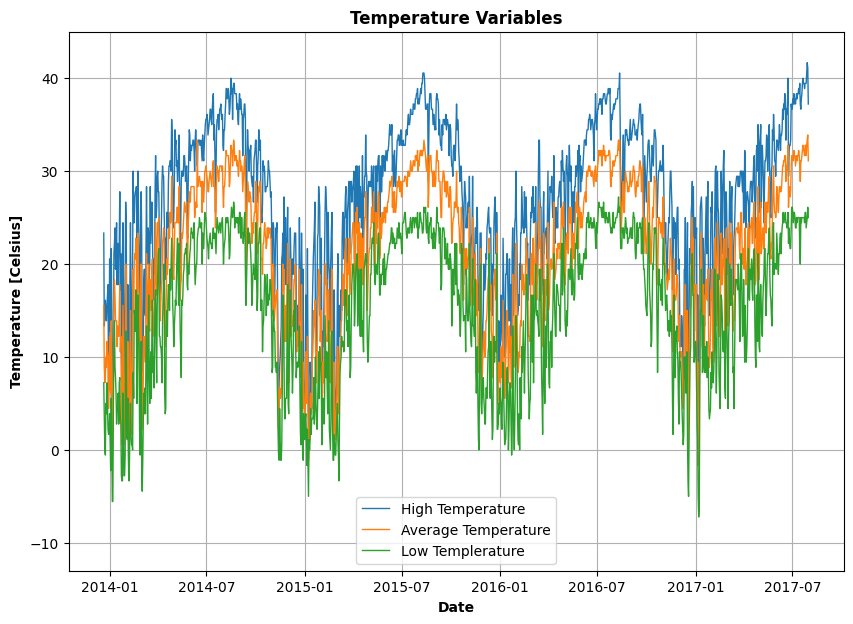

In [68]:
plt.clf()
plt.figure(figsize=(10, 7))
plt.plot(data['Date'], data['TempMax_T'], linewidth=1, color='tab:blue', label='High Temperature')
plt.plot(data['Date'], data['TempAvg_T'], linewidth=1, color='tab:orange', label='Average Temperature')
plt.plot(data['Date'], data['TempMin_T'], linewidth=1, color='tab:green', label='Low Templerature')
plt.title('Temperature Variables', weight='semibold')
plt.xlabel('Date', weight='semibold')
plt.ylabel('Temperature [Celsius]', weight='semibold')
plt.ylim(-13, 45)
plt.legend(loc='lower center')
plt.grid(True)

In [60]:
monmean = pd.DataFrame(index=pd.date_range(start=data['Date'].iloc[0], end=data['Date'].iloc[-1], freq='M'))
monmean['Temp_Max'] = data.groupby([data['Date'].dt.year, data['Date'].dt.month])['TempMax_T'].mean().values
monmean['Temp_Avg'] = data.groupby([data['Date'].dt.year, data['Date'].dt.month])['TempAvg_T'].mean().values
monmean['Temp_Min'] = data.groupby([data['Date'].dt.year, data['Date'].dt.month])['TempMin_T'].mean().values

In [61]:
monmean

,Temp_Max,Temp_Avg,Temp_Min
2013-12-31,15.000000,9.343434,3.383838
2014-01-31,17.562724,10.483871,3.118280
2014-02-28,19.146825,12.876984,6.289683
2014-03-31,21.451613,15.035842,8.387097
2014-04-30,26.574074,20.777778,14.759259
2014-05-31,29.677419,23.781362,17.616487
2014-06-30,32.759259,28.166667,22.814815
2014-07-31,35.107527,29.211470,23.100358
2014-08-31,37.240143,30.752688,24.032258
2014-09-30,32.500000,27.111111,21.518519


<Figure size 640x480 with 0 Axes>

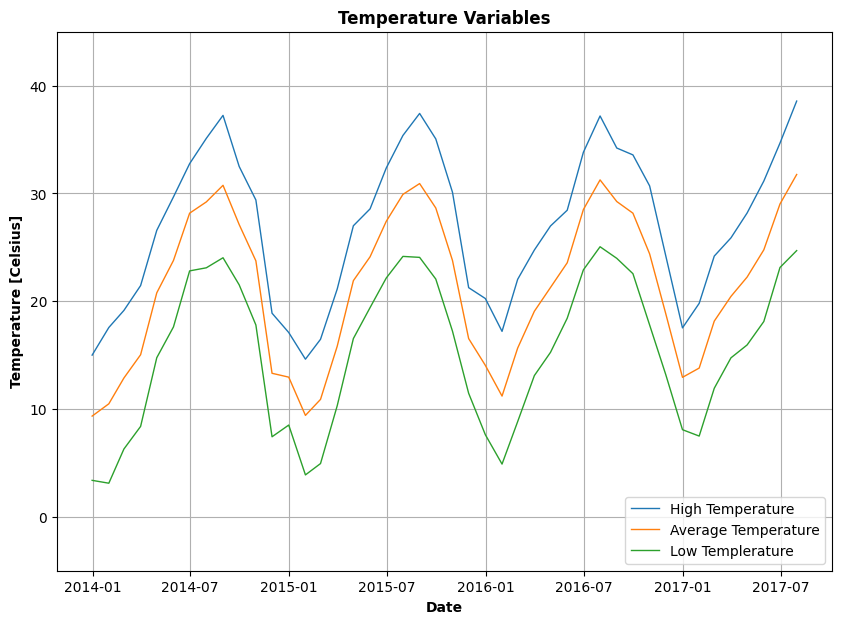

In [67]:
plt.clf()
plt.figure(figsize=(10, 7))
plt.plot(monmean['Temp_Max'], linewidth=1, color='tab:blue', label='High Temperature')
plt.plot(monmean['Temp_Avg'], linewidth=1, color='tab:orange', label='Average Temperature')
plt.plot(monmean['Temp_Min'], linewidth=1, color='tab:green', label='Low Templerature')
plt.title('Temperature Variables', weight='semibold')
plt.xlabel('Date', weight='semibold')
plt.ylabel('Temperature [Celsius]', weight='semibold')
plt.ylim(-5, 45)
plt.legend(loc='lower right')
plt.grid(True)

<Figure size 640x480 with 0 Axes>

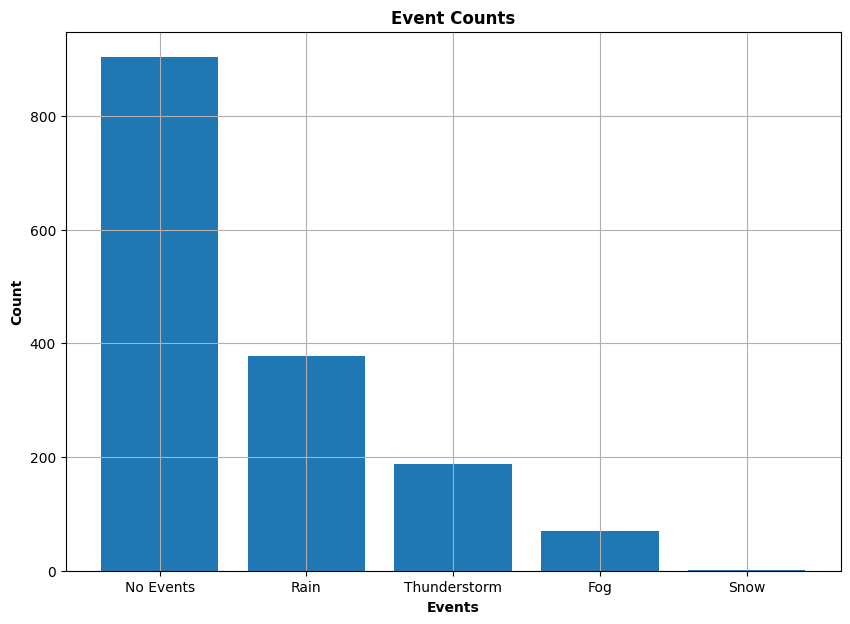

In [92]:
my_dict = {'No Events':0, 'Rain':0, 'Thunderstorm':0, 'Fog':0, 'Snow':0}
for i in range(len(data)):
    if data['Events'].iloc[i] == ' ':
        my_dict['No Events'] += 1
    else:
        for item in data['Events'].iloc[i].split(','):
            my_dict[item.strip()] += 1

plt.clf()
plt.figure(figsize=(10, 7))
plt.bar(my_dict.keys(), my_dict.values())
plt.title('Event Counts', weight='bold')
plt.xlabel('Events', weight='semibold')
plt.ylabel('Count', weight='semibold')
plt.grid(True)